In [1]:
import pandas as pd
import geopandas
import contextily as cx

gdf = geopandas.read_file("C:\\Users\\phili\\Downloads\\seoul_municipalities.shp")

df = pd.DataFrame({'longitude': [127, 127.1, 126.8], 'latitude': [37.5, 37.5, 37.5], 'z': [0, 1, 2]})
gdf2 = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))

C:\ProgramData\Miniconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


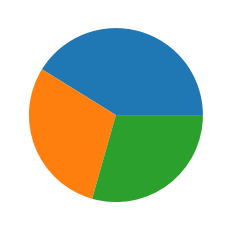

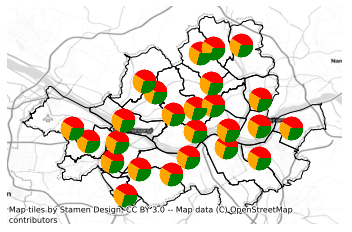

In [65]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25])
wedges = plt.pie(y)

fig, ax = plt.subplots()
ax.set_aspect('equal')

gdf.plot(ax=ax, facecolor="none", edgecolor='k',linewidth = 1)
#plt
piecolor=['r','orange','g']
for j in range(3):
    gdf2.plot(ax=ax, marker=(wedges[0][j].get_path().vertices.tolist()),facecolor=piecolor[j], markersize=500)
#plt2 = gdf2.plot(ax=ax)
cx.add_basemap(ax, crs=gdf2.crs.to_string(), zoom=11, source=cx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame({'x': [0, 1, 2], 'y': [0, 1, 2], 'z': [0, 1, 2]})
df

geometry = geopandas.points_from_xy(df['x'], df['y'], df['z'])
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])

plt.pie(y)
plt.plot(ax = plt)

C:\ProgramData\Miniconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


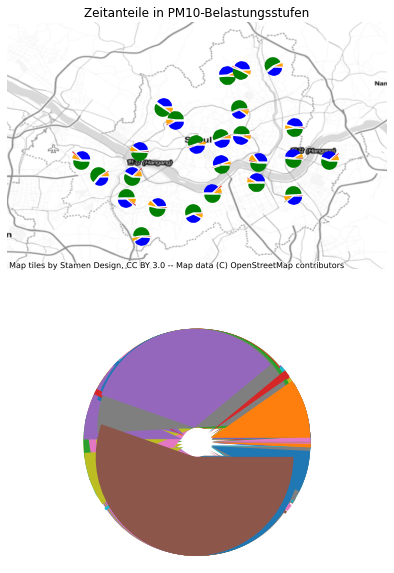

In [105]:
import pandas as pd
import geopandas
import contextily as cx
import matplotlib.pyplot as plt
import numpy as np


gdf = geopandas.read_file("C:\\Users\\phili\\Downloads\\seoul_municipalities.shp")

stationsDF = pd.read_csv("C:\\Users\\phili\\Desktop\\BigData\\PM10.csv", names = ['station', 'latitude', 'longitude','PM10_quality','percentage'])
stationsDF = stationsDF.sort_values(by='station')
gdf2 = geopandas.GeoDataFrame(stationsDF, geometry=geopandas.points_from_xy(stationsDF.longitude, stationsDF.latitude, crs="EPSG:4326"))

fig, axes = plt.subplots(2,1, figsize=(10,10))
ax = axes[0]
pieAx = axes[1]
ax.set_aspect('equal')

gdf.plot(ax=ax, facecolor="none", edgecolor='none',linewidth = 1, figsize=(200,200))

i = 0
wedges = {}
count = stationsDF['percentage'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    percentages = []
    while i < count and stationsDF.iloc[i].station == current_station:
        percentages.append(stationsDF.iloc[i].percentage)
        i+=1
        
    e = []
    for p in percentages:
        e.append(0.15)
    wedges[i] = pieAx.pie(np.array(percentages), explode=e)
    
    
piecolor=['b','g','orange','r','k']
i = 0;
count = stationsDF['percentage'].count()
while i < count:
    current_station = stationsDF.iloc[i].station
    percentages = []
    levels = []
    while i < count and stationsDF.iloc[i].station == current_station:
        levels.append(stationsDF.iloc[i].PM10_quality)
        percentages.append(stationsDF.iloc[i].percentage)
        i+=1
    
    row = gdf2.iloc[i-1]
    for j in range(len(wedges[i][0])):
        color = piecolor[levels[j]]
        ax.scatter([row.longitude],[row.latitude],marker=(wedges[i][0][j].get_path().vertices.tolist()),facecolor=color, linewidths=0.0, s=350)
        
cx.add_basemap(ax, crs=gdf2.crs.to_string(), zoom=11, source=cx.providers.Stamen.TonerLite)
ax.set_axis_off()

ax.set_title("Zeitanteile in PM10-Belastungsstufen")
plt.show()
fig.savefig("map_export.png", dpi=300)